In [2]:
import pandas as pd
import numpy as np

### Original dataset is available [here](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)

In [3]:
autos = pd.read_csv( "Auto.csv")

In [ ]:
autos.head( 10 )

In [5]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 31.0+ KB


In [6]:
autos[["mpg", "displacement","horsepower","weight","acceleration"]].describe()

,mpg,displacement,weight,acceleration
count,397.000000,397.000000,397.000000,397.000000
mean,23.515869,193.532746,2970.261965,15.555668
std,7.825804,104.379583,847.904119,2.749995
min,9.000000,68.000000,1613.000000,8.000000
25%,17.500000,104.000000,2223.000000,13.800000
50%,23.000000,146.000000,2800.000000,15.500000
75%,29.000000,262.000000,3609.000000,17.100000
max,46.600000,455.000000,5140.000000,24.800000


In [7]:
### horsepower is an object type. Which means it has some non numeric characters.
autos["horsepower"].isnull().values.any()

False

<b> Looks like there is no NULL values, but the column is of Object type. That means there must be some non-numeric characters. We must coerce all values to be numeric, which will make non-numeric values into NANs and we can then filter them out </b> 

In [8]:
autos["horsepower"] = autos["horsepower"].convert_objects(convert_numeric=True)

In [9]:
autos["horsepower"].isnull().values.any()

True

In [10]:
autos = autos.dropna()

### Basic statistics

In [11]:
autos[["mpg", "displacement","horsepower","weight","acceleration"]].describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


## Converting the categorical variables..

In [12]:
autos['cylinders'] = autos.cylinders.astype( "category" )
autos['year'] = autos.year.astype( "category" )
autos['origin'] = autos.origin.astype( "category" )

In [13]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null category
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null category
origin          392 non-null category
name            392 non-null object
dtypes: category(3), float64(4), int64(1), object(1)
memory usage: 22.8+ KB


## Using Matplotlib and seaborn for plotting graphs and charts

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

### Creating a histogram

(array([ 13.,  78.,  73.,  58.,  53.,  48.,  37.,  22.,   4.,   6.]),
 array([  9.  ,  12.76,  16.52,  20.28,  24.04,  27.8 ,  31.56,  35.32,
         39.08,  42.84,  46.6 ]),
 <a list of 10 Patch objects>)

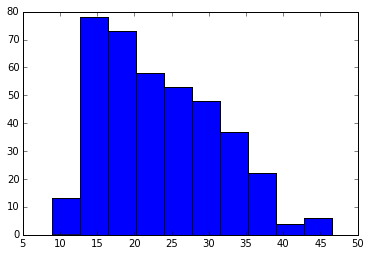

In [15]:
plt.hist( autos.mpg )

In [ ]:
plt.hist( autos.acceleration )

In [ ]:
plt.hist( autos.weight )

### Creating scatter plots

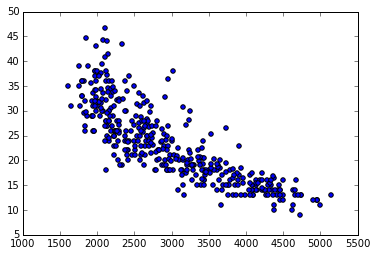

In [18]:
plt.scatter( autos.weight, autos.mpg )

In [ ]:
plt.title("Autos Mpg Vs. Weight")
plt.scatter( autos.weight, autos.mpg )

### Setting titles, x label, y lable

In [ ]:
fig = plt.figure()
plt.scatter( autos.weight, autos.mpg )
plt.title("Autos Mpg Vs. Weight")
plt.xlabel('weight', fontsize=18)
plt.ylabel('mpg', fontsize=16)

### Saving an image to local system

In [21]:
fig.savefig('test.jpg')

## Drawing elegant graphs with Seaborn

In [22]:
import seaborn as sn

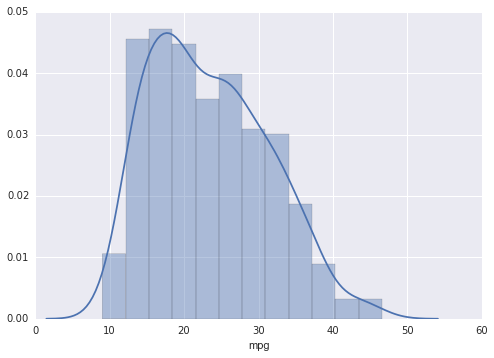

In [23]:
sn.distplot( autos.mpg )

### Setting image size and setting title in seaborn 

In [24]:
sn.set(rc={"figure.figsize": (10, 6)}); 

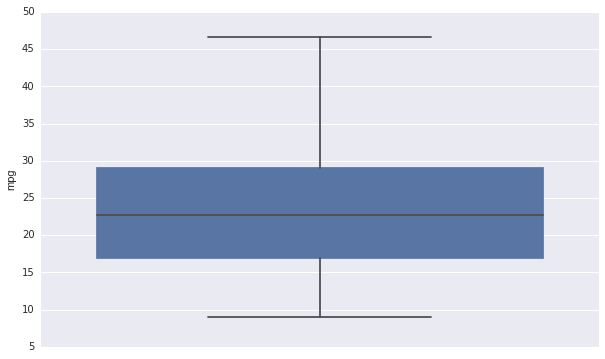

In [25]:
sn.boxplot( y = autos.mpg )

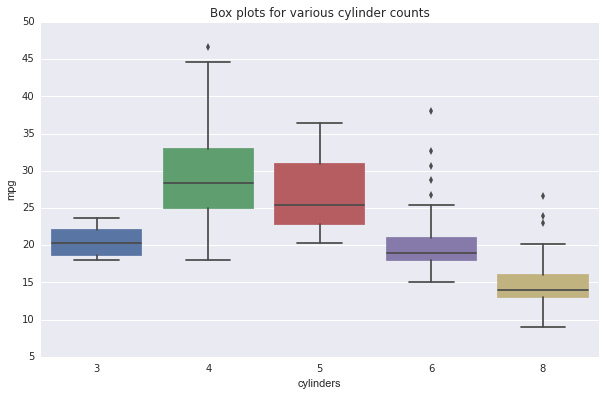

In [26]:
sn.boxplot( x = autos.cylinders, y = autos.mpg )
sn.plt.title( "Box plots for various cylinder counts")

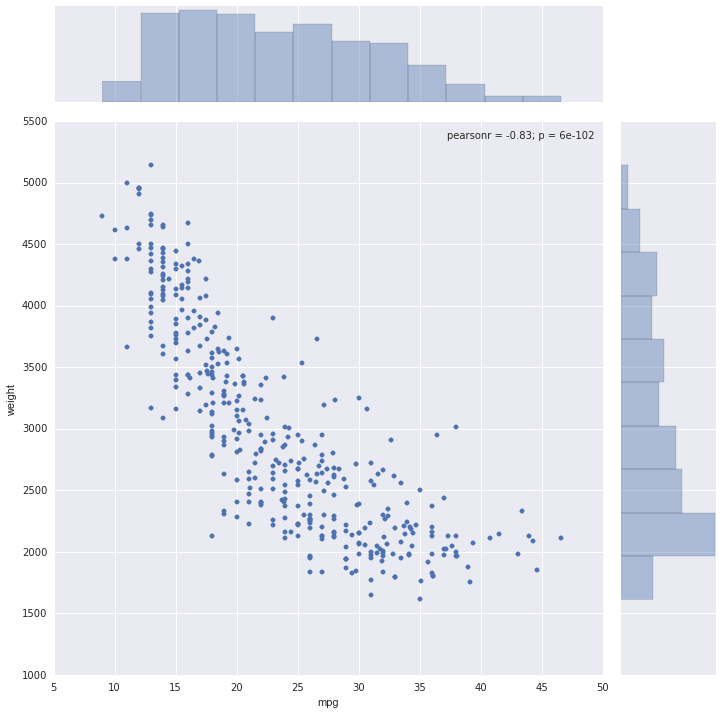

In [27]:
sn.jointplot( autos.mpg, autos.weight, size = 10 )

In [ ]:
jplt = sn.jointplot( autos.mpg, autos.weight, size = 10 )
jplt.set_axis_labels(  "miles per gallon", "weight in pounds")
#sn.plt.title( "Relationship between mpg Vs. weight"  )
jplt.fig.suptitle( "Relationship between mpg Vs. weight"  )

In [ ]:
sn.pairplot( autos )

In [30]:
autos_stats = autos[['mpg', 'displacement', 'weight', 'acceleration']]

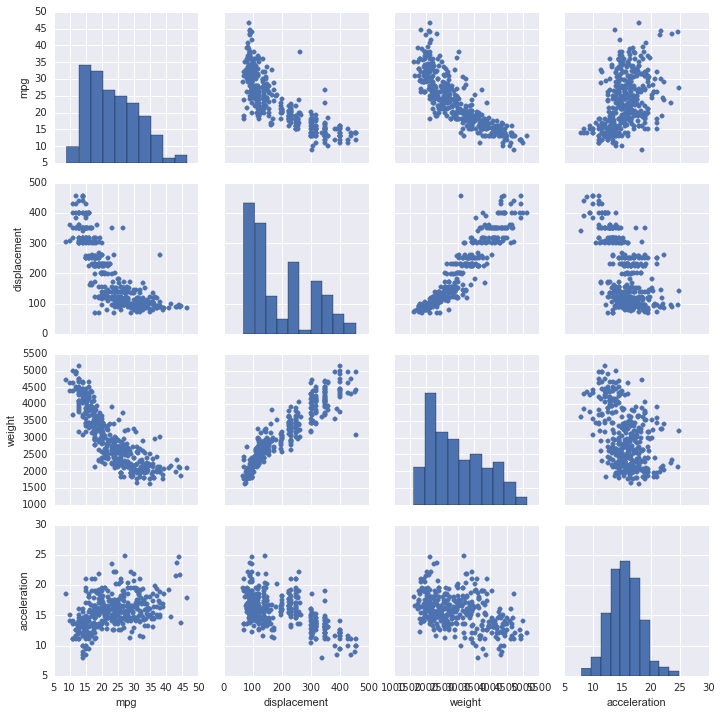

In [31]:
sn.pairplot( autos_stats )

In [ ]:
sn.pairplot( autos_stats, kind = 'reg' )

In [33]:
autos_stats = autos[['mpg', 'displacement', 'weight', 'acceleration', 'cylinders']]

In [ ]:
sn.pairplot( autos_stats, hue = 'cylinders' )

In [35]:
autos['make'] = autos.name.map( lambda x: x.split( ' ')[0] )

In [ ]:
autos.head()

In [37]:
auto_makes = pd.DataFrame( autos.make.value_counts().reset_index() )

In [38]:
auto_makes.columns = ["make", "count"]

In [39]:
auto_makes[0:10]

,make,count
0,ford,48
1,chevrolet,43
2,plymouth,31
3,dodge,28
4,amc,27
5,toyota,25
6,datsun,23
7,buick,17
8,pontiac,16
9,volkswagen,15


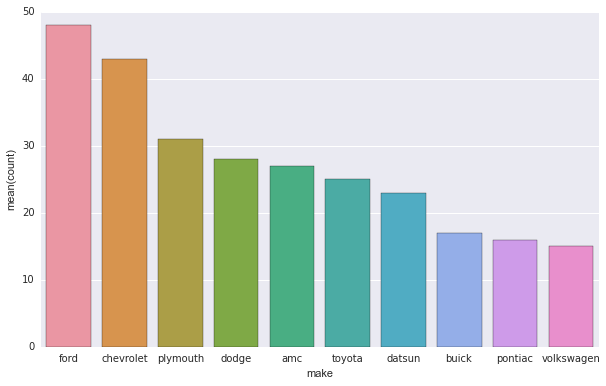

In [40]:
sn.barplot( x = "make", y = "count", data = auto_makes[0:10] )

In [41]:
mean_mpgs = autos.groupby( ["make"] )["mpg"].mean().reset_index()

In [42]:
mean_mpgs = mean_mpgs.sort( ["mpg"], ascending = False )[0:10]

In [43]:
autos[ autos.make == 'plymouth' ]["mpg"].mean()

21.703225806451616

In [44]:
mean_mpgs = mean_mpgs.merge( auto_makes, on = ["make"], how = "inner" )

In [45]:
top_most_samples = mean_mpgs.sort( ["count", "mpg" ], ascending = False )[1:10]

In [46]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 10 columns):
mpg             392 non-null float64
cylinders       392 non-null category
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null category
origin          392 non-null category
name            392 non-null object
make            392 non-null object
dtypes: category(3), float64(4), int64(1), object(2)
memory usage: 25.8+ KB


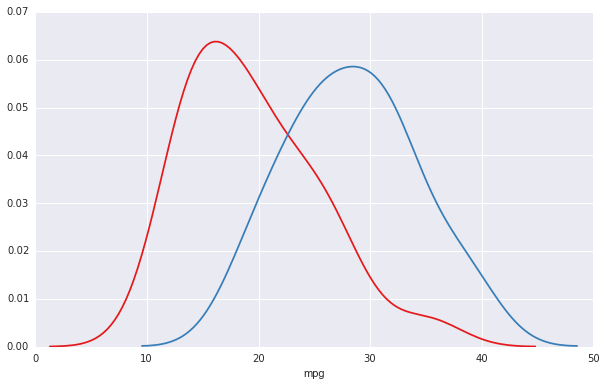

In [47]:
sn.set(rc={"figure.figsize": (10, 6)}); 
c1, c2 = sn.color_palette("Set1", 2)
sn.distplot( autos[ autos.make == "ford"]["mpg"], hist = False, color=c1 )
sn.distplot( autos[ autos.make == "toyota" ]["mpg"], hist = False, color=c2 )

In [48]:
auto_makes[0:10].make

0          ford
1     chevrolet
2      plymouth
3         dodge
4           amc
5        toyota
6        datsun
7         buick
8       pontiac
9    volkswagen
Name: make, dtype: object

In [49]:
top_samples = autos[autos["make"].isin( auto_makes[0:10].make )]

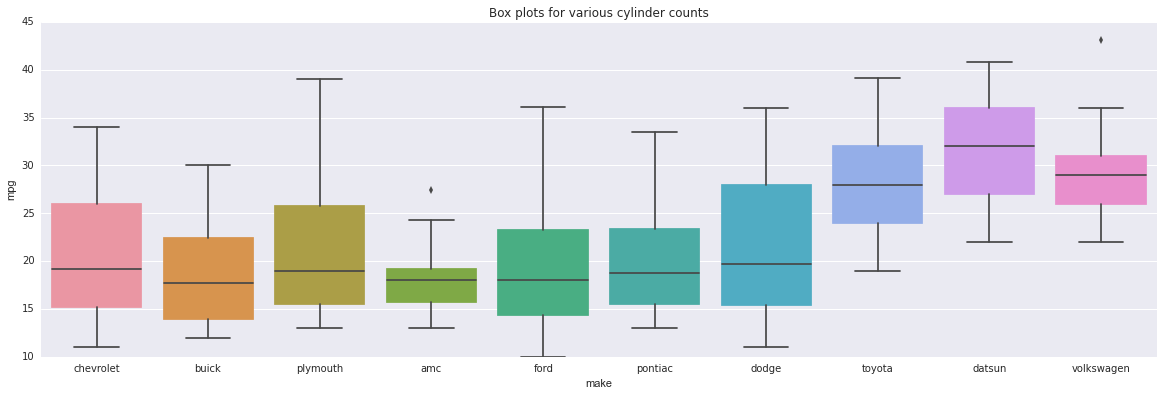

In [50]:
sn.set(rc={"figure.figsize": (20, 6)}); 
sn.boxplot( x = top_samples.make, y = top_samples.mpg )
sn.plt.title( "Box plots for various cylinder counts")

In [51]:
from scipy import stats

## Hypothesis Tests

### mpg for ford and toyota are same.

In [52]:
stats.ttest_ind( autos[ autos.make == "ford"]["mpg"], autos[ autos.make == "toyota" ]["mpg"], equal_var=True)

(-6.1722606783358644, 3.7163425400430822e-08)

### Conclusion: As p-value is less than 0.05. The Distributions are differnet and ford and toyota have completely different mpgs.

In [53]:
stats.ttest_ind( autos[ autos.make == "mazda"]["mpg"], autos[ autos.make == "amc" ]["mpg"], equal_var=True)

(7.0087550508246679, 3.7223772653708268e-08)

### Conclusion: As p-value is more than 0.05. The Distributions are not differnet and ford and amc have similar  mpgs.

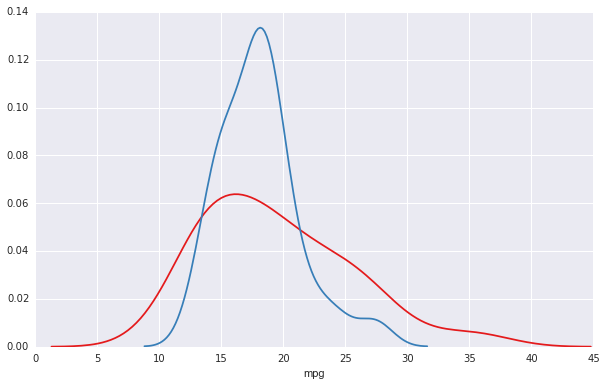

In [54]:
sn.set(rc={"figure.figsize": (10, 6)}); 
c1, c2 = sn.color_palette("Set1", 2)
sn.distplot( autos[ autos.make == "ford"]["mpg"], hist = False, color=c1 )
sn.distplot( autos[ autos.make == "amc" ]["mpg"], hist = False, color=c2 )

## Testing for Normal Distribution

In [55]:
stats.shapiro( autos[ autos.make == "amc"]["mpg"] )

(0.9345216751098633, 0.08926690369844437)